In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("E:/notes/Internships/Prodigy/Task 3/bank.csv")
print(data)


     age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0     30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1     33;"services";"married";"secondary";"no";4789;...                                                                                                  
2     35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3     30;"management";"married";"tertiary";"no";1476...                                                                                                  
4     59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  
...                                                 ...                     

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB
None


In [9]:
print(df.describe(include='all'))

       age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
count                                                4521                                                                                                  
unique                                               4521                                                                                                  
top     30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
freq                                                    1                                                                                                  


In [11]:
#Missing values
print(df.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64
   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0                                                625                                                                                                   
1                                               1193                                                                                                   
2                                               1572                                                                                                   
3                                                536                                                                                                   
4                                               4287                     

In [13]:
print(df.columns)

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [19]:
import pandas as pd
df = pd.read_csv('E:/notes/Internships/Prodigy/Task 3/bank.csv', delimiter=';')
print("Column names in the DataFrame:", df.columns)


Column names in the DataFrame: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [20]:

X = df.drop(columns='y')
y = df['y']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4521, 16)
y shape: (4521,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 16) (905, 16) (3616,) (905,)


In [27]:

y = df['y']
X = df.drop(columns='y')

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#scores
score = clf.score(X_test, y_test)
print("Model accuracy:", score)

Model accuracy: 0.8917127071823204


Accuracy: 0.8917127071823204
Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.93      0.94       807
         yes       0.50      0.59      0.54        98

    accuracy                           0.89       905
   macro avg       0.72      0.76      0.74       905
weighted avg       0.90      0.89      0.90       905

Confusion Matrix:
[[749  58]
 [ 40  58]]


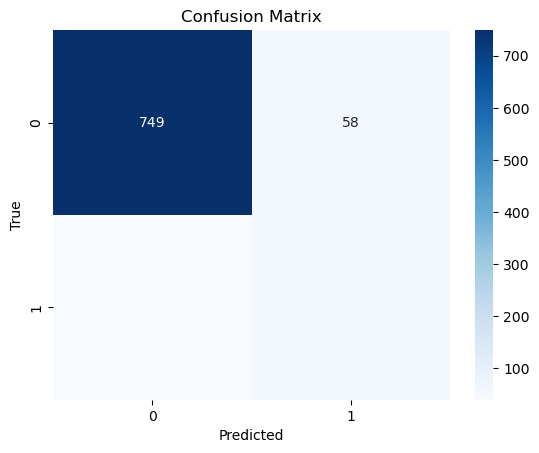

In [30]:
y_pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()